# Analysing Web API Log

## Load the data

We will retrieve all the logs 1 month back.

In [35]:
from datetime import datetime, timedelta, date

from licensing.models import *
from licensing.methods import Key, Helpers

import pandas as pd
import matplotlib.pyplot as plt

from tools import *

month_back = int(datetime.datetime.timestamp(datetime.datetime.today() - datetime.timedelta(days=30)))

logs = []

ending_before=0

"""
Loading the data
"""
while True:
    res = Key.get_web_api_log(token=get_api_token(), order_by="Id descending", limit = 1000, ending_before=ending_before)
    
    if res[0] == None:
        break
    
    logs = logs + res[0]
    
    if res[0][-1]["time"] < month_back:
        break;
        
    ending_before = res[0][-1]["id"] 
    
logs = pd.DataFrame(logs)
logs = logs[logs["time"]>month_back]


## Analyse the logs

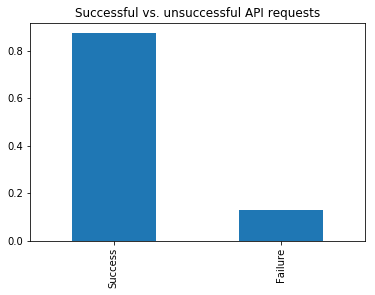

In [36]:
def success(state):
    return state % 100 // 10 - 1

logs["Success"] = success(logs["state"])
logs[logs["Success"]== 0] = "Success"
logs[logs["Success"]== 1] = "Failure"

logs["Success"].value_counts(normalize=True).plot(kind="bar", title='Successful vs. unsuccessful API requests')